In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mean 

In [19]:
def read_file(file_name):
    with open(file_name) as f:
        lines = f.readlines()
    return lines
    

In [31]:
def get_acc_str(lines, ep=500):

    final = False
    test = False
    test_acc_ls = []
    for i in range(len(lines)):
        if "Final Result" in lines[i]:
            final = True
        if final and ("Testing Acc:" in lines[i]):
            test = True
        if final and test:
            for j in range(ep):
                test_acc_ls.append(lines[i+j+1])
            break
    return (test_acc_ls)        

In [32]:
def get_acc_num(test_acc_ls, decimal = 3):
    test_acc_ls_clean = []
    for l in test_acc_ls:
        num_str = l.split(':')[1]
        num_str = num_str.split('/')[0]
        if len(num_str) >= (decimal+2):
            num_str = num_str[:(decimal+2)]
        test_acc_ls_clean.append(float(num_str))
    return test_acc_ls_clean

In [132]:
# !!!!!!!!!!!!!!!!!!
# Overwrite the functions above


def get_acc_str(lines, ep=500):
    lines = lines[1: ep+1]
    acc_str = []
    for l in lines:
        acc = l.split("Test Acc: ")[1]
        acc_str.append(float(acc[:5]))
    return acc_str
    
def get_acc_num(test_acc_ls, decimal = 3):   
    return test_acc_ls

In [35]:
def get_acc_df(file_name, ep=500, decimal=3):
#     lines = read_file(file_name)
# #     print(len(lines))
#     test_acc_ls = get_acc_str(lines, ep)
#     test_acc_ls_clean = get_acc_num(test_acc_ls, decimal)
    test_acc_ls_clean = get_acc_num(get_acc_str(read_file(file_name), ep=ep), decimal=decimal)
    test_acc_df = pd.DataFrame({'epoch':list(range(1, ep+1)), 'test_acc':test_acc_ls_clean})
    return test_acc_df

In [55]:
def avg_epoch(df, num_ep=10):
    avg_acc = []
    idx = []
    for i in range(0, len(df), num_ep):
        acc = mean(list(df["test_acc"])[i:i+num_ep])
        avg_acc.append(acc)
        idx.append(i+1)
    new_df = pd.DataFrame({'epoch':idx, 'test_acc':avg_acc})
#     print(new_df)
    return new_df

In [72]:
gcn_50rni_4layer_lr0005 = "logGNNHyb-tanh-0,5-n-True-GraphConv-lr0.0005-EXP,4,64.txt"
gat_50rni_4layer_lr0005 = "logGNNHyb-tanh-0,5-n-True-GATv2Conv-lr0.0005-EXP,4,64.txt"

gcn_50rni_4layer_lr0005_df = avg_epoch(get_acc_df(gcn_50rni_4layer_lr0005, ep, decimal), num_ep=avg)
gat_50rni_4layer_lr0005_df = avg_epoch(get_acc_df(gat_50rni_4layer_lr0005, ep, decimal), num_ep=avg)

    epoch  test_acc
0       1    0.5004
1      11    0.5011
2      21    0.5012
3      31    0.5013
4      41    0.5032
5      51    0.4989
6      61    0.5010
7      71    0.4973
8      81    0.5003
9      91    0.5029
10    101    0.5008
11    111    0.4994
12    121    0.4994
13    131    0.4991
14    141    0.4971
15    151    0.5003
16    161    0.5001
17    171    0.4982
18    181    0.4999
19    191    0.5011
20    201    0.5006
21    211    0.5000
22    221    0.5004
23    231    0.4985
24    241    0.5004
25    251    0.5013
26    261    0.5001
27    271    0.5009
28    281    0.5002
29    291    0.5024
30    301    0.5000
31    311    0.5000
32    321    0.5006
33    331    0.4996
34    341    0.5003
35    351    0.4999
36    361    0.5021
37    371    0.4993
38    381    0.4983
39    391    0.5000
40    401    0.4993
41    411    0.4997
42    421    0.5004
43    431    0.5013
44    441    0.4995
45    451    0.5000
46    461    0.5005
47    471    0.5007
48    481    0.5002


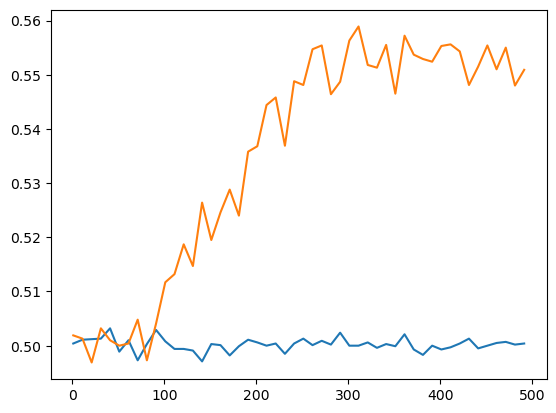

In [74]:
plt.plot(gcn_50rni_4layer_lr0005_df["epoch"], gcn_50rni_4layer_lr0005_df["test_acc"], label ='125')
plt.plot(gat_50rni_4layer_lr0005_df["epoch"], gat_50rni_4layer_lr0005_df["test_acc"], label ='22')

In [70]:
file_name_1 = "./logGNNHyb-tanh-0,125-n-True-lr0.0002-EXP,8,64.txt"
file_name_2 = "logGNNHyb-tanh-0,8-n-True-lr0.0002-EXP,8,64.txt"
file_name_3 ="logGNNHyb-tanh-0,5-n-True-lr0.0002-EXP,8,64.txt"
file_name_4 ="logGNNHyb-tanh-0,5-n-True-lr0.0005-EXP,8,64.txt"
file_name_4 ="logGNNHyb-tanh-0,5-n-True-GATv2Conv-lr0.0005-EXP,8,64.txt"

ep = 500
decimal=3
avg=10

test_acc_df_1 = avg_epoch(get_acc_df(file_name_1, ep, decimal), num_ep=avg)
test_acc_df_2 = avg_epoch(get_acc_df(file_name_2, ep, decimal), num_ep=avg)
test_acc_df_3 = avg_epoch(get_acc_df(file_name_3, ep, decimal), num_ep=avg)
test_acc_df_4 = avg_epoch(get_acc_df(file_name_4, 800, decimal), num_ep=avg)


    epoch  test_acc
0       1    0.5125
1      11    0.5232
2      21    0.5347
3      31    0.5465
4      41    0.5418
5      51    0.5455
6      61    0.5514
7      71    0.5545
8      81    0.5573
9      91    0.5728
10    101    0.5698
11    111    0.5750
12    121    0.5785
13    131    0.5831
14    141    0.5805
15    151    0.5930
16    161    0.5841
17    171    0.5796
18    181    0.5861
19    191    0.5982
20    201    0.5956
21    211    0.5952
22    221    0.5960
23    231    0.6036
24    241    0.6094
25    251    0.6027
26    261    0.6056
27    271    0.6125
28    281    0.6275
29    291    0.6218
30    301    0.6254
31    311    0.6290
32    321    0.6405
33    331    0.6455
34    341    0.6596
35    351    0.6545
36    361    0.6565
37    371    0.6667
38    381    0.6601
39    391    0.6640
40    401    0.6712
41    411    0.6819
42    421    0.6654
43    431    0.6775
44    441    0.6709
45    451    0.6749
46    461    0.6802
47    471    0.6863
48    481    0.6904


In [274]:
ep1 = 1200
ep2 = 1200
decimal=3
avg=25

# test_acc_df_1 = avg_epoch(get_acc_df(file_name_1, ep, decimal), num_ep=avg)
# test_acc_df_2 = avg_epoch(get_acc_df(file_name_2, ep, decimal), num_ep=avg)
# test_acc_df_3 = avg_epoch(get_acc_df(file_name_3, ep, decimal), num_ep=avg)
# test_acc_df_4 = avg_epoch(get_acc_df(file_name_4, 800, decimal), num_ep=avg)


def plot_exp_w_cexp(exp_125_fn, exp_50_fn, exp_875_fn, exp_100_fn, 
                    cexp_125_fn, cexp_50_fn, cexp_875_fn, cexp_100_fn, 
                    exp_gcn_50_fn, cexp_gcn_50_fn):

    exp_125 = avg_epoch(get_acc_df(exp_125_fn, ep1, decimal), num_ep=avg)
    exp_50 = avg_epoch(get_acc_df(exp_50_fn, ep2, decimal), num_ep=avg)
    exp_875 = avg_epoch(get_acc_df(exp_875_fn, ep1, decimal), num_ep=avg)
    exp_100 = avg_epoch(get_acc_df(exp_100_fn, ep1, decimal), num_ep=avg)
    
    cexp_125 = avg_epoch(get_acc_df(cexp_125_fn, ep1, decimal), num_ep=avg)
    cexp_50 = avg_epoch(get_acc_df(cexp_50_fn, ep2, decimal), num_ep=avg)
    cexp_875 = avg_epoch(get_acc_df(cexp_875_fn, ep1, decimal), num_ep=avg)
    cexp_100 = avg_epoch(get_acc_df(cexp_100_fn, ep1, decimal), num_ep=avg)
    
    exp_gcn_50 = avg_epoch(get_acc_df(exp_gcn_50_fn, ep2, decimal), num_ep=avg)
    cexp_gcn_50 = avg_epoch(get_acc_df(cexp_gcn_50_fn, ep2, decimal), num_ep=avg)
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
#     fig.suptitle('Horizontally stacked subplots')
    ax1.plot(exp_125["epoch"], [0.5]*len(exp_125["epoch"]), label="GAT",c='darkred')
    ax1.plot(exp_125["epoch"], exp_125["test_acc"], label ='GAT-12.5%')
    ax1.plot(exp_50["epoch"], exp_50["test_acc"], label ='GAT-50%')
    ax1.plot(exp_875["epoch"], exp_875["test_acc"], label ='GAT-87.5%')
    ax1.plot(exp_100["epoch"], exp_100["test_acc"], label ='GAT-100%', color="hotpink")
    ax1.grid()
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Test Accuracy")
#     ax1.legend(fontsize=8)
    
    ax1.legend(fontsize=8, loc='lower center', bbox_to_anchor=(1.12, -0.455),ncol=5, fancybox=True)
#     ax1.legend(fontsize=8, loc='center right', bbox_to_anchor=(-1, 0.5))
    
#     ax1.set_ylim(0.49, 1.0)
    ax1.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
    ax1.xaxis.set_ticks(np.arange(0, 1201, 200))
    ax1.set_title("(a) EXP")
    
    ax2.plot(cexp_100["epoch"], [0.5]*len(cexp_100["epoch"]), label="GAT",c='darkred')
    ax2.plot(cexp_125["epoch"], cexp_125["test_acc"], label ='GAT-12.5%')
    ax2.plot(cexp_50["epoch"], cexp_50["test_acc"], label ='GAT-50%')
    ax2.plot(cexp_875["epoch"], cexp_875["test_acc"], label ='GAT-87.5%')
    ax2.plot(cexp_100["epoch"], cexp_100["test_acc"], label ='GAT-100%', color="hotpink")
    ax2.grid()
    ax2.set_xlabel("Epoch")
    ax2.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
    ax2.xaxis.set_ticks(np.arange(0, 1201, 200))
#     ax2.legend(fontsize=8)
    ax2.set_title("(b) CEXP")
#     ax2.set_ylim(0.49, 0.76)
    
#     ax3.plot(cexp_100["epoch"], [0.5]*len(cexp_100["epoch"]), label="GAT",c='darkred')
    ax3.plot(exp_gcn_50["epoch"], exp_gcn_50["test_acc"], label ='EXP: GCN-50%', color='darkviolet')
    ax3.plot(cexp_gcn_50["epoch"], cexp_gcn_50["test_acc"], label ='CEXP:GCN-50%', color='forestgreen')
    ax3.plot(exp_50["epoch"], exp_50["test_acc"], label ='EXP: GAT-50%')
    ax3.plot(cexp_50["epoch"], cexp_50["test_acc"], label ='CEXP:GAT-50%')
    ax3.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
    ax3.grid()
    ax3.set_xlabel("Epoch")
#     ax3.legend(fontsize=8)
    ax3.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.565),ncol=2, fancybox=True)
    ax3.set_title("(c) GCN-RNI v.s. GAT-RNI")
    ax3.yaxis.set_ticks(np.arange(0.5, 1.01, 0.1))
    ax3.xaxis.set_ticks(np.arange(0, 1201, 200))
    
    fig.savefig("gat_rni.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    

    epoch  test_acc
0       1   0.52964
1      26   0.56472
2      51   0.57992
3      76   0.62340
4     101   0.68404
5     126   0.71472
6     151   0.73092
7     176   0.74900
8     201   0.78848
9     226   0.80136
10    251   0.81296
11    276   0.80832
12    301   0.82840
13    326   0.83964
14    351   0.83328
15    376   0.84528
16    401   0.83728
17    426   0.85504
18    451   0.84136
19    476   0.84544
20    501   0.85500
21    526   0.85768
22    551   0.86128
23    576   0.85956
24    601   0.86260
25    626   0.87060
26    651   0.87724
27    676   0.88008
28    701   0.88864
29    726   0.89528
30    751   0.89520
31    776   0.89560
32    801   0.90328
33    826   0.90904
34    851   0.90232
35    876   0.90288
36    901   0.91204
37    926   0.91400
38    951   0.92100
39    976   0.92644
40   1001   0.91404
41   1026   0.91096
42   1051   0.92768
43   1076   0.91900
44   1101   0.91728
45   1126   0.91860
46   1151   0.93364
47   1176   0.93132
    epoch  test_acc


/var/folders/nt/jcdlqvrn7y90tv8lss00b06r0000gn/T/ipykernel_33928/3697164748.py:78: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


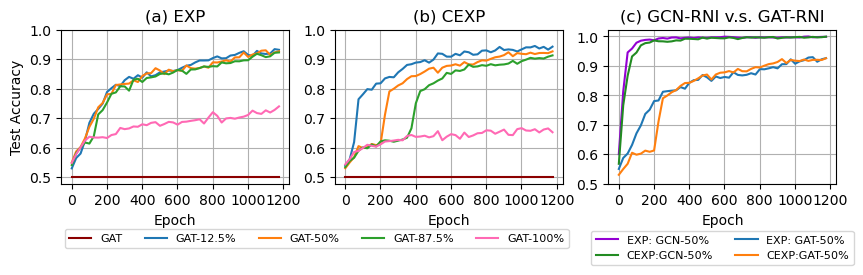

In [275]:
# exp_125_fn = "logGNNHyb-tanh-0,125-n-True-GATv2Conv-lr0.0002-EXP,8,64.txt"
# exp_50_fn = "logGNNHyb-tanh-0,5-n-True-GATv2Conv-lr0.0002-EXP,8,64.txt"
# exp_875_fn = "logGNNHyb-tanh-0,875-n-True-GATv2Conv-lr0.0002-EXP,8,64.txt"
# exp_100_fn = "logGNNHyb-tanh-1,0-n-True-GATv2Conv-lr0.0002-EXP,8,64.txt"

exp_125_fn = "logGNNHyb-elu-0,125-n-True-GATv2Conv-elu-1200-10-lr0.0002-EXP,8,64.txt" 
exp_50_fn = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-1200-10-lr0.0002-EXP,8,64.txt" 
exp_875_fn =  "logGNNHyb-elu-0,875-n-True-GATv2Conv-elu-1200-10-lr0.0002-EXP,8,64.txt" 
exp_100_fn = "logGNNHyb-elu-1,0-n-True-GATv2Conv-elu-1200-10-lr0.0002-EXP,8,64.txt" 

# cexp_125_fn = "logGNNHyb-tanh-0,125-n-True-GATv2Conv-lr0.0002-CEXP,8,64.txt"
# cexp_50_fn = "logGNNHyb-tanh-0,5-n-True-GATv2Conv-lr0.0002-CEXP,8,64.txt"
# cexp_875_fn = "logGNNHyb-tanh-0,875-n-True-GATv2Conv-lr0.0002-CEXP,8,64.txt"
# cexp_100_fn = "logGNNHyb-tanh-1,0-n-True-GATv2Conv-lr0.0002-CEXP,8,64.txt"


cexp_125_fn = "logGNNHyb-elu-0,125-n-True-GATv2Conv-elu-1200-10-lr0.0002-CEXP,8,64.txt" 
cexp_50_fn = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-1200-10-lr0.0002-CEXP,8,64.txt" 
cexp_875_fn =  "logGNNHyb-elu-0,875-n-True-GATv2Conv-elu-1200-10-lr0.0002-CEXP,8,64.txt" 
cexp_100_fn ="logGNNHyb-elu-1,0-n-True-GATv2Conv-elu-1200-10-lr0.0002-CEXP,8,64.txt" 


exp_gcn_50_fn = "logGNNHyb-elu-0,5-n-True-GraphConv-elu-1200-10-lr0.0002-EXP,8,64.txt"
cexp_gcn_50_fn = "logGNNHyb-elu-0,5-n-True-GraphConv-elu-1200-10-lr0.0002-CEXP,8,64.txt"

plot_exp_w_cexp(exp_125_fn, exp_50_fn, exp_875_fn, exp_100_fn, 
                cexp_125_fn, cexp_50_fn, cexp_875_fn, cexp_100_fn,  
                exp_gcn_50_fn, cexp_gcn_50_fn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


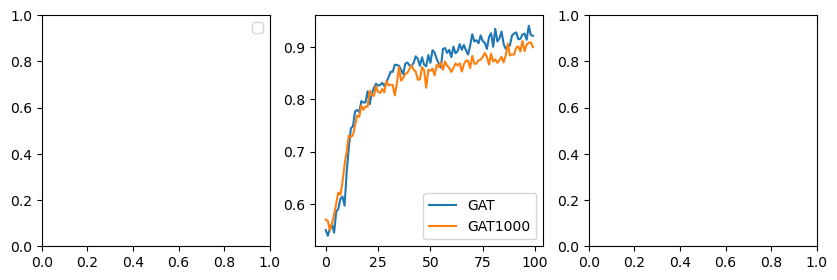

In [131]:
file = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-800-3-lr0.0002-EXP,8,64.txt"
file_1 = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-800-5-lr0.0002-EXP,8,64.txt"
file_2 = "logGNNHyb-elu-0,5-n-True-GraphConv-elu-800-10-lr0.0002-EXP,8,64.txt"
file_3 = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-1000-10-lr0.0002-CEXP,8,64.txt"
file_4 = "logGNNHyb-elu-0,5-n-True-GATv2Conv-elu-1000-10-lr0.0002-EXP,8,64.txt"

def test_plot(file):
    lines = read_file(file)
    acc = []

    lines = lines[1: 1001]
    for i in range(len(lines)):
        l = lines[i]
        acc_str = l.split("Test Acc: ")[1]
        acc.append(float(acc_str[:5]))

    acc_mean = []
    for i in range(0,len(acc),10):
        acc_mean.append(mean(acc[i: i+10]))
    return acc_mean


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
# ls_1 = (test_plot(file))
# ls_2 = (test_plot(file_1))
# ax1.plot(ls_1, label="3")
# ax1.plot(ls_2, label="5")
ax1.legend()

# ax2.plot(test_plot(file_2), label="GCN")
ax2.plot(test_plot(file_3), label="GAT")
ax2.plot(test_plot(file_4), label="GAT1000")
ax2.legend()
